In [15]:
import pandas as pd 
import numpy as np

In [16]:
df = pd.read_csv("gas_turbines.csv")

In [17]:
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [18]:
#dorping 'TIT' and 'CDP' as they are not ambient features
df = df.drop(['TIT','CDP'],axis=1)

In [23]:
df.describe()

,AT,AP,AH,AFDP,GTEP,TAT,TEY,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,545.396183,134.188464,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,7.866803,15.829717,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,512.450000,100.170000,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,542.170000,127.985000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,549.890000,133.780000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,550.060000,140.895000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,550.610000,174.610000,44.103000,119.890000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TAT     15039 non-null  float64
 6   TEY     15039 non-null  float64
 7   CO      15039 non-null  float64
 8   NOX     15039 non-null  float64
dtypes: float64(9)
memory usage: 1.0 MB


In [25]:
df.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TAT     0
TEY     0
CO      0
NOX     0
dtype: int64

In [26]:
df[df.duplicated()].shape

(0, 9)

In [27]:
array = df.values
X = array[:,0:8]
Y = array[:,8]

In [28]:
from sklearn.preprocessing import StandardScaler
a = StandardScaler()
a.fit(X)
X_standardized = a.transform(X)

In [29]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [30]:
model = Sequential()
model.add(Dense(30, input_dim=8,  activation='relu'))
model.add(Dense(15,  activation='relu')) 
model.add(Dense(1, activation='relu')) 

In [36]:
model.compile(optimizer='sgd',loss='mse',metrics=[tensorflow.keras.metrics.MeanAbsoluteError()])

In [37]:
history = model.fit(X, Y, validation_split=0.33, epochs=250, batch_size=10)

Epoch 1/250
1008/1008 [==============================] - 2s 2ms/step - loss: 4950.7412 - mean_absolute_error: 69.6506 - val_loss: 4371.6323 - val_mean_absolute_error: 65.2275
Epoch 2/250
1008/1008 [==============================] - 2s 2ms/step - loss: 4950.7378 - mean_absolute_error: 69.6505 - val_loss: 4371.6323 - val_mean_absolute_error: 65.2275
Epoch 3/250
1008/1008 [==============================] - 2s 2ms/step - loss: 4950.7378 - mean_absolute_error: 69.6506 - val_loss: 4371.6323 - val_mean_absolute_error: 65.2275
Epoch 4/250
1008/1008 [==============================] - 2s 2ms/step - loss: 4950.7378 - mean_absolute_error: 69.6507 - val_loss: 4371.6323 - val_mean_absolute_error: 65.2275
Epoch 5/250
1008/1008 [==============================] - 2s 2ms/step - loss: 4950.7437 - mean_absolute_error: 69.6506 - val_loss: 4371.6323 - val_mean_absolute_error: 65.2275
Epoch 6/250
1008/1008 [==============================] - 2s 2ms/step - loss: 4950.7402 - mean_absolute_error: 69.6506 - val_l

1008/1008 [==============================] - 2s 2ms/step - loss: 4950.7373 - mean_absolute_error: 69.6507 - val_loss: 4371.6323 - val_mean_absolute_error: 65.2275
Epoch 94/250
1008/1008 [==============================] - 2s 2ms/step - loss: 4950.7422 - mean_absolute_error: 69.6507 - val_loss: 4371.6323 - val_mean_absolute_error: 65.2275
Epoch 95/250
1008/1008 [==============================] - 2s 2ms/step - loss: 4950.7412 - mean_absolute_error: 69.6506 - val_loss: 4371.6323 - val_mean_absolute_error: 65.2275
Epoch 96/250
1008/1008 [==============================] - 2s 2ms/step - loss: 4950.7422 - mean_absolute_error: 69.6506 - val_loss: 4371.6323 - val_mean_absolute_error: 65.2275
Epoch 97/250
1008/1008 [==============================] - 2s 2ms/step - loss: 4950.7378 - mean_absolute_error: 69.6506 - val_loss: 4371.6323 - val_mean_absolute_error: 65.2275
Epoch 98/250
1008/1008 [==============================] - 2s 2ms/step - loss: 4950.7441 - mean_absolute_error: 69.6506 - val_loss: 43

1008/1008 [==============================] - 2s 1ms/step - loss: 4950.7397 - mean_absolute_error: 69.6507 - val_loss: 4371.6323 - val_mean_absolute_error: 65.2275
Epoch 186/250
1008/1008 [==============================] - 2s 2ms/step - loss: 4950.7402 - mean_absolute_error: 69.6506 - val_loss: 4371.6323 - val_mean_absolute_error: 65.2275
Epoch 187/250
1008/1008 [==============================] - 2s 2ms/step - loss: 4950.7397 - mean_absolute_error: 69.6506 - val_loss: 4371.6323 - val_mean_absolute_error: 65.2275
Epoch 188/250
1008/1008 [==============================] - 1s 1ms/step - loss: 4950.7373 - mean_absolute_error: 69.6505 - val_loss: 4371.6323 - val_mean_absolute_error: 65.2275
Epoch 189/250
1008/1008 [==============================] - 1s 1ms/step - loss: 4950.7402 - mean_absolute_error: 69.6506 - val_loss: 4371.6323 - val_mean_absolute_error: 65.2275
Epoch 190/250
1008/1008 [==============================] - 2s 2ms/step - loss: 4950.7378 - mean_absolute_error: 69.6506 - val_los

In [40]:
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]))

470/470 [==============================] - 1s 1ms/step - loss: 4759.6279 - mean_absolute_error: 68.1910
mean_absolute_error: 68.19%


In [41]:
model.metrics_names

['loss', 'mean_absolute_error']

In [42]:
model.history.history.keys()

dict_keys([])

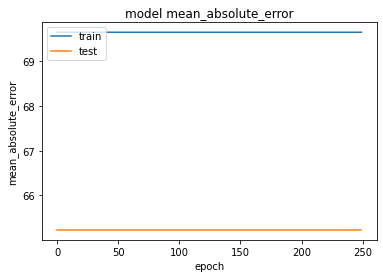

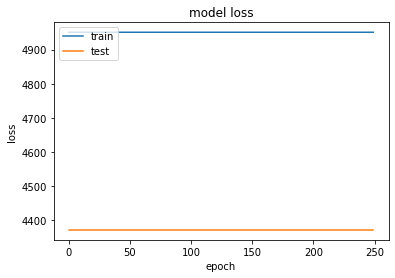

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model mean_absolute_error')
plt.ylabel('mean_absolute_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [48]:
Array = df.values
X = Array[:,0:8]
Y = Array[:,8]

In [51]:
from sklearn.preprocessing import StandardScaler
a = StandardScaler()
a.fit(X)
X_standardized = a.transform(X)

# Tuning of Hyperparameters :- Batch Size and Epochs

In [52]:
from sklearn.model_selection import GridSearchCV, KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam

In [53]:
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=8, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(8,kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='relu'))
    
    adam=Adam(lr=0.01)
    model.compile(optimizer='sgd',loss='mse',metrics=[tensorflow.keras.metrics.MeanAbsoluteError()])
    return model

In [54]:
model = KerasClassifier(build_fn = create_model,verbose = 0)
batch_size = [10,20,40]
epochs = [10,50,100,150]
param_grid = dict(batch_size = batch_size,epochs = epochs)
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,Y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START batch_size=10, epochs=10...................................


C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accur

[CV 1/5; 1/12] END ......batch_size=10, epochs=10;, score=nan total time=  12.0s
[CV 2/5; 1/12] START batch_size=10, epochs=10...................................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 2/5; 1/12] END ......batch_size=10, epochs=10;, score=nan total time=  12.5s
[CV 3/5; 1/12] START batch_size=10, epochs=10...................................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 3/5; 1/12] END ......batch_size=10, epochs=10;, score=nan total time=  11.9s
[CV 4/5; 1/12] START batch_size=10, epochs=10...................................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 4/5; 1/12] END ......batch_size=10, epochs=10;, score=nan total time=  12.8s
[CV 5/5; 1/12] START batch_size=10, epochs=10...................................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 5/5; 1/12] END ......batch_size=10, epochs=10;, score=nan total time=  12.1s
[CV 1/5; 2/12] START batch_size=10, epochs=50...................................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 1/5; 2/12] END ......batch_size=10, epochs=50;, score=nan total time=  57.0s
[CV 2/5; 2/12] START batch_size=10, epochs=50...................................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 2/5; 2/12] END ......batch_size=10, epochs=50;, score=nan total time=  54.2s
[CV 3/5; 2/12] START batch_size=10, epochs=50...................................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 3/5; 2/12] END ......batch_size=10, epochs=50;, score=nan total time=  59.3s
[CV 4/5; 2/12] START batch_size=10, epochs=50...................................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 4/5; 2/12] END ......batch_size=10, epochs=50;, score=nan total time=  58.3s
[CV 5/5; 2/12] START batch_size=10, epochs=50...................................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 5/5; 2/12] END ......batch_size=10, epochs=50;, score=nan total time=  57.6s
[CV 1/5; 3/12] START batch_size=10, epochs=100..................................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 1/5; 3/12] END .....batch_size=10, epochs=100;, score=nan total time= 1.9min
[CV 2/5; 3/12] START batch_size=10, epochs=100..................................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 2/5; 3/12] END .....batch_size=10, epochs=100;, score=nan total time= 2.0min
[CV 3/5; 3/12] START batch_size=10, epochs=100..................................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 3/5; 3/12] END .....batch_size=10, epochs=100;, score=nan total time= 1.8min
[CV 4/5; 3/12] START batch_size=10, epochs=100..................................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 4/5; 3/12] END .....batch_size=10, epochs=100;, score=nan total time= 1.7min
[CV 5/5; 3/12] START batch_size=10, epochs=100..................................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 5/5; 3/12] END .....batch_size=10, epochs=100;, score=nan total time= 1.8min
[CV 1/5; 4/12] START batch_size=10, epochs=150..................................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 1/5; 4/12] END .....batch_size=10, epochs=150;, score=nan total time= 2.7min
[CV 2/5; 4/12] START batch_size=10, epochs=150..................................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 2/5; 4/12] END .....batch_size=10, epochs=150;, score=nan total time= 2.7min
[CV 3/5; 4/12] START batch_size=10, epochs=150..................................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 3/5; 4/12] END .....batch_size=10, epochs=150;, score=nan total time= 2.7min
[CV 4/5; 4/12] START batch_size=10, epochs=150..................................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 4/5; 4/12] END .....batch_size=10, epochs=150;, score=nan total time= 2.7min
[CV 5/5; 4/12] START batch_size=10, epochs=150..................................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 5/5; 4/12] END .....batch_size=10, epochs=150;, score=nan total time= 2.8min
[CV 1/5; 5/12] START batch_size=20, epochs=10...................................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 1/5; 5/12] END ......batch_size=20, epochs=10;, score=nan total time=   6.3s
[CV 2/5; 5/12] START batch_size=20, epochs=10...................................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 2/5; 5/12] END ......batch_size=20, epochs=10;, score=nan total time=   6.2s
[CV 3/5; 5/12] START batch_size=20, epochs=10...................................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 3/5; 5/12] END ......batch_size=20, epochs=10;, score=nan total time=   6.1s
[CV 4/5; 5/12] START batch_size=20, epochs=10...................................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 4/5; 5/12] END ......batch_size=20, epochs=10;, score=nan total time=   6.2s
[CV 5/5; 5/12] START batch_size=20, epochs=10...................................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 5/5; 5/12] END ......batch_size=20, epochs=10;, score=nan total time=   6.3s
[CV 1/5; 6/12] START batch_size=20, epochs=50...................................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 1/5; 6/12] END ......batch_size=20, epochs=50;, score=nan total time=  28.4s
[CV 2/5; 6/12] START batch_size=20, epochs=50...................................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 2/5; 6/12] END ......batch_size=20, epochs=50;, score=nan total time=  27.5s
[CV 3/5; 6/12] START batch_size=20, epochs=50...................................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 3/5; 6/12] END ......batch_size=20, epochs=50;, score=nan total time=  27.8s
[CV 4/5; 6/12] START batch_size=20, epochs=50...................................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 4/5; 6/12] END ......batch_size=20, epochs=50;, score=nan total time=  27.7s
[CV 5/5; 6/12] START batch_size=20, epochs=50...................................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 5/5; 6/12] END ......batch_size=20, epochs=50;, score=nan total time=  28.1s
[CV 1/5; 7/12] START batch_size=20, epochs=100..................................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 1/5; 7/12] END .....batch_size=20, epochs=100;, score=nan total time=  54.4s
[CV 2/5; 7/12] START batch_size=20, epochs=100..................................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 2/5; 7/12] END .....batch_size=20, epochs=100;, score=nan total time=  55.1s
[CV 3/5; 7/12] START batch_size=20, epochs=100..................................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 3/5; 7/12] END .....batch_size=20, epochs=100;, score=nan total time=  54.4s
[CV 4/5; 7/12] START batch_size=20, epochs=100..................................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 4/5; 7/12] END .....batch_size=20, epochs=100;, score=nan total time=  54.6s
[CV 5/5; 7/12] START batch_size=20, epochs=100..................................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 5/5; 7/12] END .....batch_size=20, epochs=100;, score=nan total time=  53.9s
[CV 1/5; 8/12] START batch_size=20, epochs=150..................................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 1/5; 8/12] END .....batch_size=20, epochs=150;, score=nan total time= 1.4min
[CV 2/5; 8/12] START batch_size=20, epochs=150..................................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 2/5; 8/12] END .....batch_size=20, epochs=150;, score=nan total time= 1.4min
[CV 3/5; 8/12] START batch_size=20, epochs=150..................................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 3/5; 8/12] END .....batch_size=20, epochs=150;, score=nan total time= 1.4min
[CV 4/5; 8/12] START batch_size=20, epochs=150..................................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 4/5; 8/12] END .....batch_size=20, epochs=150;, score=nan total time= 1.5min
[CV 5/5; 8/12] START batch_size=20, epochs=150..................................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


[CV 5/5; 8/12] END .....batch_size=20, epochs=150;, score=nan total time= 1.4min
[CV 1/5; 9/12] START batch_size=40, epochs=10...................................


C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accur

[CV 1/5; 9/12] END ......batch_size=40, epochs=10;, score=nan total time=   4.1s
[CV 2/5; 9/12] START batch_size=40, epochs=10...................................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 2/5; 9/12] END ......batch_size=40, epochs=10;, score=nan total time=   3.6s
[CV 3/5; 9/12] START batch_size=40, epochs=10...................................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 3/5; 9/12] END ......batch_size=40, epochs=10;, score=nan total time=   3.4s
[CV 4/5; 9/12] START batch_size=40, epochs=10...................................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 4/5; 9/12] END ......batch_size=40, epochs=10;, score=nan total time=   3.6s
[CV 5/5; 9/12] START batch_size=40, epochs=10...................................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 5/5; 9/12] END ......batch_size=40, epochs=10;, score=nan total time=   3.4s
[CV 1/5; 10/12] START batch_size=40, epochs=50..................................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 1/5; 10/12] END .....batch_size=40, epochs=50;, score=nan total time=  14.2s
[CV 2/5; 10/12] START batch_size=40, epochs=50..................................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 2/5; 10/12] END .....batch_size=40, epochs=50;, score=nan total time=  14.9s
[CV 3/5; 10/12] START batch_size=40, epochs=50..................................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 3/5; 10/12] END .....batch_size=40, epochs=50;, score=nan total time=  14.3s
[CV 4/5; 10/12] START batch_size=40, epochs=50..................................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 4/5; 10/12] END .....batch_size=40, epochs=50;, score=nan total time=  13.9s
[CV 5/5; 10/12] START batch_size=40, epochs=50..................................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 5/5; 10/12] END .....batch_size=40, epochs=50;, score=nan total time=  14.6s
[CV 1/5; 11/12] START batch_size=40, epochs=100.................................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 1/5; 11/12] END ....batch_size=40, epochs=100;, score=nan total time=  27.8s
[CV 2/5; 11/12] START batch_size=40, epochs=100.................................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 2/5; 11/12] END ....batch_size=40, epochs=100;, score=nan total time=  28.4s
[CV 3/5; 11/12] START batch_size=40, epochs=100.................................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 3/5; 11/12] END ....batch_size=40, epochs=100;, score=nan total time=  27.9s
[CV 4/5; 11/12] START batch_size=40, epochs=100.................................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 4/5; 11/12] END ....batch_size=40, epochs=100;, score=nan total time=  28.0s
[CV 5/5; 11/12] START batch_size=40, epochs=100.................................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 5/5; 11/12] END ....batch_size=40, epochs=100;, score=nan total time=  28.0s
[CV 1/5; 12/12] START batch_size=40, epochs=150.................................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 1/5; 12/12] END ....batch_size=40, epochs=150;, score=nan total time=  42.0s
[CV 2/5; 12/12] START batch_size=40, epochs=150.................................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 2/5; 12/12] END ....batch_size=40, epochs=150;, score=nan total time=  43.7s
[CV 3/5; 12/12] START batch_size=40, epochs=150.................................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 3/5; 12/12] END ....batch_size=40, epochs=150;, score=nan total time=  44.6s
[CV 4/5; 12/12] START batch_size=40, epochs=150.................................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 4/5; 12/12] END ....batch_size=40, epochs=150;, score=nan total time=  41.9s
[CV 5/5; 12/12] START batch_size=40, epochs=150.................................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: On

[CV 5/5; 12/12] END ....batch_size=40, epochs=150;, score=nan total time=  42.1s


In [55]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : nan, using {'batch_size': 10, 'epochs': 10}
nan,nan with: {'batch_size': 10, 'epochs': 10}
nan,nan with: {'batch_size': 10, 'epochs': 50}
nan,nan with: {'batch_size': 10, 'epochs': 100}
nan,nan with: {'batch_size': 10, 'epochs': 150}
nan,nan with: {'batch_size': 20, 'epochs': 10}
nan,nan with: {'batch_size': 20, 'epochs': 50}
nan,nan with: {'batch_size': 20, 'epochs': 100}
nan,nan with: {'batch_size': 20, 'epochs': 150}
nan,nan with: {'batch_size': 40, 'epochs': 10}
nan,nan with: {'batch_size': 40, 'epochs': 50}
nan,nan with: {'batch_size': 40, 'epochs': 100}
nan,nan with: {'batch_size': 40, 'epochs': 150}


# Tuning of Hyperparameters:- Learning rate and Drop out rate

In [56]:
from tensorflow.keras.layers import Dropout

def create_model(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(8,input_dim =8,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(12,input_dim =8,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'relu'))
    
    adam = Adam(lr = learning_rate)
    model.compile(optimizer='sgd',loss='mse',metrics=[tensorflow.keras.metrics.MeanAbsoluteError()])
    return model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 50)

learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]

param_grids = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,Y)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accur

[CV 1/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=nan total time=  14.4s
[CV 2/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 2/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=nan total time=  14.5s
[CV 3/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 3/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=nan total time=  14.5s
[CV 4/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 4/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=nan total time=  14.6s
[CV 5/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 5/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=nan total time=  14.2s
[CV 1/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 1/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=nan total time=  14.2s
[CV 2/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 2/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=nan total time=  14.4s
[CV 3/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 3/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=nan total time=  14.2s
[CV 4/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 4/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=nan total time=  14.1s
[CV 5/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 5/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=nan total time=  14.3s
[CV 1/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 1/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=nan total time=  14.3s
[CV 2/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 2/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=nan total time=  14.5s
[CV 3/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 3/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=nan total time=  13.9s
[CV 4/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 4/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=nan total time=  14.5s
[CV 5/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


[CV 5/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=nan total time=  14.8s
[CV 1/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accur

[CV 1/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=nan total time=  16.2s
[CV 2/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 2/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=nan total time=  16.5s
[CV 3/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 3/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=nan total time=  15.5s
[CV 4/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 4/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=nan total time=  15.9s
[CV 5/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 5/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=nan total time=  16.0s
[CV 1/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 1/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=nan total time=  15.5s
[CV 2/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 2/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=nan total time=  16.4s
[CV 3/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 3/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=nan total time=  17.0s
[CV 4/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 4/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=nan total time=  16.4s
[CV 5/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 5/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=nan total time=  15.7s
[CV 1/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 1/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=nan total time=  16.6s
[CV 2/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 2/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=nan total time=  15.9s
[CV 3/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 3/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=nan total time=  15.6s
[CV 4/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 4/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=nan total time=  16.3s
[CV 5/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 5/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=nan total time=  16.7s
[CV 1/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 1/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=nan total time=  16.6s
[CV 2/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 2/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=nan total time=  16.3s
[CV 3/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 3/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=nan total time=  16.7s
[CV 4/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 4/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=nan total time=  16.1s
[CV 5/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 5/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=nan total time=  16.0s
[CV 1/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 1/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=nan total time=  15.9s
[CV 2/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 2/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=nan total time=  16.3s
[CV 3/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 3/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=nan total time=  15.9s
[CV 4/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 4/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=nan total time=  16.2s
[CV 5/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 5/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=nan total time=  15.7s
[CV 1/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 1/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=nan total time=  16.7s
[CV 2/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 2/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=nan total time=  16.5s
[CV 3/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 3/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=nan total time=  15.7s
[CV 4/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 4/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=nan total time=  15.9s
[CV 5/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: On

[CV 5/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=nan total time=  15.8s


In [57]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : nan, using {'dropout_rate': 0.0, 'learning_rate': 0.001}
nan,nan with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
nan,nan with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
nan,nan with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
nan,nan with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
nan,nan with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
nan,nan with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
nan,nan with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
nan,nan with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
nan,nan with: {'dropout_rate': 0.2, 'learning_rate': 0.1}


# Tuning of Hyperparameters:- Activation Function and Kernel Initializer

In [58]:
def create_model(activation_function,init):
    model = Sequential()
    model.add(Dense(8,input_dim =8,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.2))
    model.add(Dense(12,input_dim =8,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation = 'relu'))
    
    adam = Adam(lr = 0.001)
    model.compile(optimizer='sgd',loss='mse',metrics=[tensorflow.keras.metrics.MeanAbsoluteError()])
    return model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 50)

activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']

param_grids = dict(activation_function = activation_function,init = init)

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,Y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START activation_function=softmax, init=uniform..................


C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accur

[CV 1/5; 1/12] END activation_function=softmax, init=uniform;, score=nan total time=  17.4s
[CV 2/5; 1/12] START activation_function=softmax, init=uniform..................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 2/5; 1/12] END activation_function=softmax, init=uniform;, score=nan total time=  16.7s
[CV 3/5; 1/12] START activation_function=softmax, init=uniform..................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 3/5; 1/12] END activation_function=softmax, init=uniform;, score=nan total time=  17.2s
[CV 4/5; 1/12] START activation_function=softmax, init=uniform..................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 4/5; 1/12] END activation_function=softmax, init=uniform;, score=nan total time=  17.3s
[CV 5/5; 1/12] START activation_function=softmax, init=uniform..................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 5/5; 1/12] END activation_function=softmax, init=uniform;, score=nan total time=  17.3s
[CV 1/5; 2/12] START activation_function=softmax, init=normal...................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 1/5; 2/12] END activation_function=softmax, init=normal;, score=nan total time=  17.5s
[CV 2/5; 2/12] START activation_function=softmax, init=normal...................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 2/5; 2/12] END activation_function=softmax, init=normal;, score=nan total time=  17.2s
[CV 3/5; 2/12] START activation_function=softmax, init=normal...................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 3/5; 2/12] END activation_function=softmax, init=normal;, score=nan total time=  17.5s
[CV 4/5; 2/12] START activation_function=softmax, init=normal...................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 4/5; 2/12] END activation_function=softmax, init=normal;, score=nan total time=  18.0s
[CV 5/5; 2/12] START activation_function=softmax, init=normal...................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 5/5; 2/12] END activation_function=softmax, init=normal;, score=nan total time=  17.5s
[CV 1/5; 3/12] START activation_function=softmax, init=zero.....................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 1/5; 3/12] END activation_function=softmax, init=zero;, score=nan total time=  17.8s
[CV 2/5; 3/12] START activation_function=softmax, init=zero.....................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 2/5; 3/12] END activation_function=softmax, init=zero;, score=nan total time=  17.2s
[CV 3/5; 3/12] START activation_function=softmax, init=zero.....................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 3/5; 3/12] END activation_function=softmax, init=zero;, score=nan total time=  17.0s
[CV 4/5; 3/12] START activation_function=softmax, init=zero.....................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 4/5; 3/12] END activation_function=softmax, init=zero;, score=nan total time=  16.7s
[CV 5/5; 3/12] START activation_function=softmax, init=zero.....................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 5/5; 3/12] END activation_function=softmax, init=zero;, score=nan total time=  17.2s
[CV 1/5; 4/12] START activation_function=relu, init=uniform.....................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 1/5; 4/12] END activation_function=relu, init=uniform;, score=nan total time=  16.3s
[CV 2/5; 4/12] START activation_function=relu, init=uniform.....................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 2/5; 4/12] END activation_function=relu, init=uniform;, score=nan total time=  15.8s
[CV 3/5; 4/12] START activation_function=relu, init=uniform.....................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 3/5; 4/12] END activation_function=relu, init=uniform;, score=nan total time=  16.0s
[CV 4/5; 4/12] START activation_function=relu, init=uniform.....................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 4/5; 4/12] END activation_function=relu, init=uniform;, score=nan total time=  16.1s
[CV 5/5; 4/12] START activation_function=relu, init=uniform.....................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 5/5; 4/12] END activation_function=relu, init=uniform;, score=nan total time=  16.2s
[CV 1/5; 5/12] START activation_function=relu, init=normal......................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 1/5; 5/12] END activation_function=relu, init=normal;, score=nan total time=  16.6s
[CV 2/5; 5/12] START activation_function=relu, init=normal......................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 2/5; 5/12] END activation_function=relu, init=normal;, score=nan total time=  15.9s
[CV 3/5; 5/12] START activation_function=relu, init=normal......................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 3/5; 5/12] END activation_function=relu, init=normal;, score=nan total time=  16.4s
[CV 4/5; 5/12] START activation_function=relu, init=normal......................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 4/5; 5/12] END activation_function=relu, init=normal;, score=nan total time=  16.3s
[CV 5/5; 5/12] START activation_function=relu, init=normal......................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 5/5; 5/12] END activation_function=relu, init=normal;, score=nan total time=  16.8s
[CV 1/5; 6/12] START activation_function=relu, init=zero........................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 1/5; 6/12] END activation_function=relu, init=zero;, score=nan total time=  16.3s
[CV 2/5; 6/12] START activation_function=relu, init=zero........................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 2/5; 6/12] END activation_function=relu, init=zero;, score=nan total time=  15.9s
[CV 3/5; 6/12] START activation_function=relu, init=zero........................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 3/5; 6/12] END activation_function=relu, init=zero;, score=nan total time=  15.9s
[CV 4/5; 6/12] START activation_function=relu, init=zero........................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 4/5; 6/12] END activation_function=relu, init=zero;, score=nan total time=  16.0s
[CV 5/5; 6/12] START activation_function=relu, init=zero........................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 5/5; 6/12] END activation_function=relu, init=zero;, score=nan total time=  16.2s
[CV 1/5; 7/12] START activation_function=tanh, init=uniform.....................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 1/5; 7/12] END activation_function=tanh, init=uniform;, score=nan total time=  16.1s
[CV 2/5; 7/12] START activation_function=tanh, init=uniform.....................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 2/5; 7/12] END activation_function=tanh, init=uniform;, score=nan total time=  16.8s
[CV 3/5; 7/12] START activation_function=tanh, init=uniform.....................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 3/5; 7/12] END activation_function=tanh, init=uniform;, score=nan total time=  15.7s
[CV 4/5; 7/12] START activation_function=tanh, init=uniform.....................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 4/5; 7/12] END activation_function=tanh, init=uniform;, score=nan total time=  16.6s
[CV 5/5; 7/12] START activation_function=tanh, init=uniform.....................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 5/5; 7/12] END activation_function=tanh, init=uniform;, score=nan total time=  15.7s
[CV 1/5; 8/12] START activation_function=tanh, init=normal......................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 1/5; 8/12] END activation_function=tanh, init=normal;, score=nan total time=  16.0s
[CV 2/5; 8/12] START activation_function=tanh, init=normal......................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 2/5; 8/12] END activation_function=tanh, init=normal;, score=nan total time=  16.2s
[CV 3/5; 8/12] START activation_function=tanh, init=normal......................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 3/5; 8/12] END activation_function=tanh, init=normal;, score=nan total time=  16.6s
[CV 4/5; 8/12] START activation_function=tanh, init=normal......................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 4/5; 8/12] END activation_function=tanh, init=normal;, score=nan total time=  16.0s
[CV 5/5; 8/12] START activation_function=tanh, init=normal......................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 5/5; 8/12] END activation_function=tanh, init=normal;, score=nan total time=  15.8s
[CV 1/5; 9/12] START activation_function=tanh, init=zero........................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 1/5; 9/12] END activation_function=tanh, init=zero;, score=nan total time=  16.0s
[CV 2/5; 9/12] START activation_function=tanh, init=zero........................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 2/5; 9/12] END activation_function=tanh, init=zero;, score=nan total time=  16.3s
[CV 3/5; 9/12] START activation_function=tanh, init=zero........................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 3/5; 9/12] END activation_function=tanh, init=zero;, score=nan total time=  16.0s
[CV 4/5; 9/12] START activation_function=tanh, init=zero........................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 4/5; 9/12] END activation_function=tanh, init=zero;, score=nan total time=  16.0s
[CV 5/5; 9/12] START activation_function=tanh, init=zero........................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 5/5; 9/12] END activation_function=tanh, init=zero;, score=nan total time=  16.2s
[CV 1/5; 10/12] START activation_function=linear, init=uniform..................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 1/5; 10/12] END activation_function=linear, init=uniform;, score=nan total time=  16.1s
[CV 2/5; 10/12] START activation_function=linear, init=uniform..................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 2/5; 10/12] END activation_function=linear, init=uniform;, score=nan total time=  16.4s
[CV 3/5; 10/12] START activation_function=linear, init=uniform..................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 3/5; 10/12] END activation_function=linear, init=uniform;, score=nan total time=  16.0s
[CV 4/5; 10/12] START activation_function=linear, init=uniform..................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 4/5; 10/12] END activation_function=linear, init=uniform;, score=nan total time=  15.9s
[CV 5/5; 10/12] START activation_function=linear, init=uniform..................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 5/5; 10/12] END activation_function=linear, init=uniform;, score=nan total time=  16.0s
[CV 1/5; 11/12] START activation_function=linear, init=normal...................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 1/5; 11/12] END activation_function=linear, init=normal;, score=nan total time=  15.8s
[CV 2/5; 11/12] START activation_function=linear, init=normal...................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 2/5; 11/12] END activation_function=linear, init=normal;, score=nan total time=  15.9s
[CV 3/5; 11/12] START activation_function=linear, init=normal...................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 3/5; 11/12] END activation_function=linear, init=normal;, score=nan total time=  17.0s
[CV 4/5; 11/12] START activation_function=linear, init=normal...................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 4/5; 11/12] END activation_function=linear, init=normal;, score=nan total time=  15.7s
[CV 5/5; 11/12] START activation_function=linear, init=normal...................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 5/5; 11/12] END activation_function=linear, init=normal;, score=nan total time=  15.8s
[CV 1/5; 12/12] START activation_function=linear, init=zero.....................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 1/5; 12/12] END activation_function=linear, init=zero;, score=nan total time=  15.9s
[CV 2/5; 12/12] START activation_function=linear, init=zero.....................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 2/5; 12/12] END activation_function=linear, init=zero;, score=nan total time=  16.1s
[CV 3/5; 12/12] START activation_function=linear, init=zero.....................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 3/5; 12/12] END activation_function=linear, init=zero;, score=nan total time=  16.5s
[CV 4/5; 12/12] START activation_function=linear, init=zero.....................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 4/5; 12/12] END activation_function=linear, init=zero;, score=nan total time=  13.4s
[CV 5/5; 12/12] START activation_function=linear, init=zero.....................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: On

[CV 5/5; 12/12] END activation_function=linear, init=zero;, score=nan total time=  16.3s


In [59]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : nan, using {'activation_function': 'softmax', 'init': 'uniform'}
nan,nan with: {'activation_function': 'softmax', 'init': 'uniform'}
nan,nan with: {'activation_function': 'softmax', 'init': 'normal'}
nan,nan with: {'activation_function': 'softmax', 'init': 'zero'}
nan,nan with: {'activation_function': 'relu', 'init': 'uniform'}
nan,nan with: {'activation_function': 'relu', 'init': 'normal'}
nan,nan with: {'activation_function': 'relu', 'init': 'zero'}
nan,nan with: {'activation_function': 'tanh', 'init': 'uniform'}
nan,nan with: {'activation_function': 'tanh', 'init': 'normal'}
nan,nan with: {'activation_function': 'tanh', 'init': 'zero'}
nan,nan with: {'activation_function': 'linear', 'init': 'uniform'}
nan,nan with: {'activation_function': 'linear', 'init': 'normal'}
nan,nan with: {'activation_function': 'linear', 'init': 'zero'}


# Tuning of Hyperparameter :-Number of Neurons in activation layer

In [60]:
def create_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim =8,kernel_initializer = 'uniform',activation = 'linear'))
    model.add(Dropout(0.2))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'uniform',activation = 'linear'))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation = 'relu'))
    
    adam = Adam(lr = 0.001)
    model.compile(optimizer='sgd',loss='mse',metrics=[tensorflow.keras.metrics.MeanAbsoluteError()])
    return model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 50)

neuron1 = [4,8,16]
neuron2 = [2,4,8]

param_grids = dict(neuron1 = neuron1,neuron2 = neuron2)

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,Y)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START neuron1=4, neuron2=2........................................


C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accur

[CV 1/5; 1/9] END ...........neuron1=4, neuron2=2;, score=nan total time=  15.2s
[CV 2/5; 1/9] START neuron1=4, neuron2=2........................................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 2/5; 1/9] END ...........neuron1=4, neuron2=2;, score=nan total time=  17.2s
[CV 3/5; 1/9] START neuron1=4, neuron2=2........................................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 3/5; 1/9] END ...........neuron1=4, neuron2=2;, score=nan total time=  15.2s
[CV 4/5; 1/9] START neuron1=4, neuron2=2........................................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 4/5; 1/9] END ...........neuron1=4, neuron2=2;, score=nan total time=  15.0s
[CV 5/5; 1/9] START neuron1=4, neuron2=2........................................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 5/5; 1/9] END ...........neuron1=4, neuron2=2;, score=nan total time=  14.9s
[CV 1/5; 2/9] START neuron1=4, neuron2=4........................................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 1/5; 2/9] END ...........neuron1=4, neuron2=4;, score=nan total time=  15.0s
[CV 2/5; 2/9] START neuron1=4, neuron2=4........................................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 2/5; 2/9] END ...........neuron1=4, neuron2=4;, score=nan total time=  15.7s
[CV 3/5; 2/9] START neuron1=4, neuron2=4........................................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 3/5; 2/9] END ...........neuron1=4, neuron2=4;, score=nan total time=  15.9s
[CV 4/5; 2/9] START neuron1=4, neuron2=4........................................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 4/5; 2/9] END ...........neuron1=4, neuron2=4;, score=nan total time=  15.2s
[CV 5/5; 2/9] START neuron1=4, neuron2=4........................................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 5/5; 2/9] END ...........neuron1=4, neuron2=4;, score=nan total time=  15.9s
[CV 1/5; 3/9] START neuron1=4, neuron2=8........................................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 1/5; 3/9] END ...........neuron1=4, neuron2=8;, score=nan total time=  16.3s
[CV 2/5; 3/9] START neuron1=4, neuron2=8........................................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 2/5; 3/9] END ...........neuron1=4, neuron2=8;, score=nan total time=  21.5s
[CV 3/5; 3/9] START neuron1=4, neuron2=8........................................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 3/5; 3/9] END ...........neuron1=4, neuron2=8;, score=nan total time=  16.2s
[CV 4/5; 3/9] START neuron1=4, neuron2=8........................................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 4/5; 3/9] END ...........neuron1=4, neuron2=8;, score=nan total time=  20.5s
[CV 5/5; 3/9] START neuron1=4, neuron2=8........................................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 5/5; 3/9] END ...........neuron1=4, neuron2=8;, score=nan total time=  24.3s
[CV 1/5; 4/9] START neuron1=8, neuron2=2........................................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 1/5; 4/9] END ...........neuron1=8, neuron2=2;, score=nan total time=  23.8s
[CV 2/5; 4/9] START neuron1=8, neuron2=2........................................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 2/5; 4/9] END ...........neuron1=8, neuron2=2;, score=nan total time=  24.4s
[CV 3/5; 4/9] START neuron1=8, neuron2=2........................................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 3/5; 4/9] END ...........neuron1=8, neuron2=2;, score=nan total time=  24.0s
[CV 4/5; 4/9] START neuron1=8, neuron2=2........................................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 4/5; 4/9] END ...........neuron1=8, neuron2=2;, score=nan total time=  23.8s
[CV 5/5; 4/9] START neuron1=8, neuron2=2........................................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 5/5; 4/9] END ...........neuron1=8, neuron2=2;, score=nan total time=  22.9s
[CV 1/5; 5/9] START neuron1=8, neuron2=4........................................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 1/5; 5/9] END ...........neuron1=8, neuron2=4;, score=nan total time=  24.2s
[CV 2/5; 5/9] START neuron1=8, neuron2=4........................................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 2/5; 5/9] END ...........neuron1=8, neuron2=4;, score=nan total time=  23.5s
[CV 3/5; 5/9] START neuron1=8, neuron2=4........................................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 3/5; 5/9] END ...........neuron1=8, neuron2=4;, score=nan total time=  23.3s
[CV 4/5; 5/9] START neuron1=8, neuron2=4........................................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 4/5; 5/9] END ...........neuron1=8, neuron2=4;, score=nan total time=  22.1s
[CV 5/5; 5/9] START neuron1=8, neuron2=4........................................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 5/5; 5/9] END ...........neuron1=8, neuron2=4;, score=nan total time=  22.3s
[CV 1/5; 6/9] START neuron1=8, neuron2=8........................................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 1/5; 6/9] END ...........neuron1=8, neuron2=8;, score=nan total time=  22.3s
[CV 2/5; 6/9] START neuron1=8, neuron2=8........................................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 2/5; 6/9] END ...........neuron1=8, neuron2=8;, score=nan total time=  23.4s
[CV 3/5; 6/9] START neuron1=8, neuron2=8........................................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 3/5; 6/9] END ...........neuron1=8, neuron2=8;, score=nan total time=  23.9s
[CV 4/5; 6/9] START neuron1=8, neuron2=8........................................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 4/5; 6/9] END ...........neuron1=8, neuron2=8;, score=nan total time=  23.5s
[CV 5/5; 6/9] START neuron1=8, neuron2=8........................................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 5/5; 6/9] END ...........neuron1=8, neuron2=8;, score=nan total time=  25.3s
[CV 1/5; 7/9] START neuron1=16, neuron2=2.......................................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 1/5; 7/9] END ..........neuron1=16, neuron2=2;, score=nan total time=  24.5s
[CV 2/5; 7/9] START neuron1=16, neuron2=2.......................................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 2/5; 7/9] END ..........neuron1=16, neuron2=2;, score=nan total time=  25.9s
[CV 3/5; 7/9] START neuron1=16, neuron2=2.......................................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 3/5; 7/9] END ..........neuron1=16, neuron2=2;, score=nan total time=  24.4s
[CV 4/5; 7/9] START neuron1=16, neuron2=2.......................................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 4/5; 7/9] END ..........neuron1=16, neuron2=2;, score=nan total time=  25.6s
[CV 5/5; 7/9] START neuron1=16, neuron2=2.......................................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 5/5; 7/9] END ..........neuron1=16, neuron2=2;, score=nan total time=  24.4s
[CV 1/5; 8/9] START neuron1=16, neuron2=4.......................................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 1/5; 8/9] END ..........neuron1=16, neuron2=4;, score=nan total time=  24.7s
[CV 2/5; 8/9] START neuron1=16, neuron2=4.......................................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 2/5; 8/9] END ..........neuron1=16, neuron2=4;, score=nan total time=  25.3s
[CV 3/5; 8/9] START neuron1=16, neuron2=4.......................................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 3/5; 8/9] END ..........neuron1=16, neuron2=4;, score=nan total time=  24.4s
[CV 4/5; 8/9] START neuron1=16, neuron2=4.......................................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 4/5; 8/9] END ..........neuron1=16, neuron2=4;, score=nan total time=  24.9s
[CV 5/5; 8/9] START neuron1=16, neuron2=4.......................................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 5/5; 8/9] END ..........neuron1=16, neuron2=4;, score=nan total time=  24.1s
[CV 1/5; 9/9] START neuron1=16, neuron2=8.......................................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 1/5; 9/9] END ..........neuron1=16, neuron2=8;, score=nan total time=  24.9s
[CV 2/5; 9/9] START neuron1=16, neuron2=8.......................................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 2/5; 9/9] END ..........neuron1=16, neuron2=8;, score=nan total time=  25.1s
[CV 3/5; 9/9] START neuron1=16, neuron2=8.......................................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 3/5; 9/9] END ..........neuron1=16, neuron2=8;, score=nan total time=  17.9s
[CV 4/5; 9/9] START neuron1=16, neuron2=8.......................................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:37

[CV 4/5; 9/9] END ..........neuron1=16, neuron2=8;, score=nan total time=  16.4s
[CV 5/5; 9/9] START neuron1=16, neuron2=8.......................................


C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lazin\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lazin\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 305, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
C:\Users\lazin\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: On

[CV 5/5; 9/9] END ..........neuron1=16, neuron2=8;, score=nan total time=  16.3s


In [61]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : nan, using {'neuron1': 4, 'neuron2': 2}
nan,nan with: {'neuron1': 4, 'neuron2': 2}
nan,nan with: {'neuron1': 4, 'neuron2': 4}
nan,nan with: {'neuron1': 4, 'neuron2': 8}
nan,nan with: {'neuron1': 8, 'neuron2': 2}
nan,nan with: {'neuron1': 8, 'neuron2': 4}
nan,nan with: {'neuron1': 8, 'neuron2': 8}
nan,nan with: {'neuron1': 16, 'neuron2': 2}
nan,nan with: {'neuron1': 16, 'neuron2': 4}
nan,nan with: {'neuron1': 16, 'neuron2': 8}
